In [19]:
import os
import numpy as np
import time
import copy
import sys
import argparse

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as colors

import cp2k_utilities as cu

ang_2_bohr = 1.0/0.52917721067
hart_2_ev = 27.21138602


In [20]:
npz_file = "/home/kristjan/sshfs/daint_scratch/cp2k_cnt_12_0/L15-ideal/morbs_grid_dx0.4.npz"

In [21]:
npz_file_data = np.load(npz_file)

morb_grids = npz_file_data['morb_grids']
morb_energies = npz_file_data['morb_energies']
dv = npz_file_data['dv']
eval_cell_origin = npz_file_data['eval_cell_origin']
emin, emax = npz_file_data['elim']
ref_energy = npz_file_data['ref_energy']
geom_name = npz_file_data['geom_label']

In [22]:
morb_energies

array([-0.97481422, -0.97477362, -0.86131254, -0.86127166, -0.74781312,
       -0.74777195, -0.63442833, -0.63438688, -0.52129761, -0.52125587,
       -0.40862581, -0.40858378, -0.29680582, -0.29676349, -0.18695067,
       -0.18690799, -0.08460201, -0.08455895, -0.00424635, -0.00423658,
        0.00379337,  0.0037942 ,  0.00379745,  0.00379835,  0.0676431 ,
        0.06768542,  0.16648255,  0.16652545,  0.27463331,  0.27467651,
        0.38412154,  0.384165  ,  0.49369699,  0.49374067,  0.60299132,
        0.60303521,  0.71185638,  0.71190047,  0.82022242,  0.82026671,
        0.82847011,  0.82847039,  0.85590269,  0.85590295,  0.90321988,
        0.90322012,  0.92805578,  0.92810025,  0.93191036,  0.95430917,
        0.96763383,  0.96763404,  0.99414294])

In [23]:
np.shape(morb_grids)

(53, 400, 43, 43)

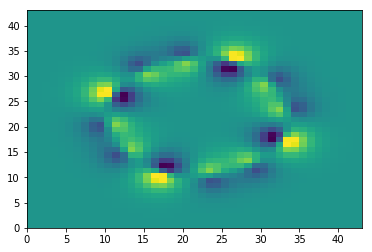

In [44]:
plt.pcolormesh(morb_grids[0, 150, :, :].T)
plt.show()

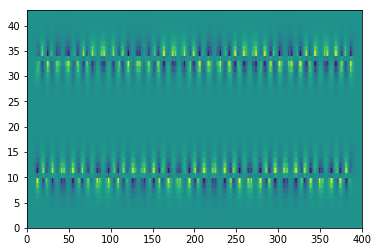

In [36]:
plt.pcolormesh(morb_grids[0, :, :, 20].T)
plt.show()

In [37]:
polarization = np.array([1.0, 1.0, 1.0])
polarization /= np.linalg.norm(polarization)
polarization

array([ 0.57735027,  0.57735027,  0.57735027])

In [41]:
opr_morbs = []

for i in range(len(morb_grids)):
    grad = np.gradient(morb_grids[0])
    opr_morbs.append(grad[0]*polarization[0] + grad[1]*polarization[1] + grad[2]*polarization[2])

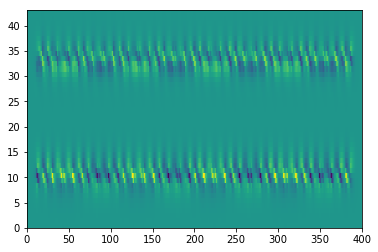

In [43]:
plt.pcolormesh(opr_morbs[0][:, :, 20].T)
plt.show()

In [66]:
i1 = 0
i2 = 1
vol_elem = dv[0]*dv[1]*dv[2]
print(np.dot(morb_grids[i1].ravel(), morb_grids[i2].ravel())*vol_elem)
print(np.dot(opr_morbs[i1].ravel(), morb_grids[i2].ravel())*vol_elem)

-8.30121170275e-06
-4.8741480039e-07


In [61]:
morb_energies

array([-0.97481422, -0.97477362, -0.86131254, -0.86127166, -0.74781312,
       -0.74777195, -0.63442833, -0.63438688, -0.52129761, -0.52125587,
       -0.40862581, -0.40858378, -0.29680582, -0.29676349, -0.18695067,
       -0.18690799, -0.08460201, -0.08455895, -0.00424635, -0.00423658,
        0.00379337,  0.0037942 ,  0.00379745,  0.00379835,  0.0676431 ,
        0.06768542,  0.16648255,  0.16652545,  0.27463331,  0.27467651,
        0.38412154,  0.384165  ,  0.49369699,  0.49374067,  0.60299132,
        0.60303521,  0.71185638,  0.71190047,  0.82022242,  0.82026671,
        0.82847011,  0.82847039,  0.85590269,  0.85590295,  0.90321988,
        0.90322012,  0.92805578,  0.92810025,  0.93191036,  0.95430917,
        0.96763383,  0.96763404,  0.99414294])

In [70]:
i_homo = 19
morb_energies[i_homo]

-0.0042365774685020341

In [94]:
i1 = 5+i_homo
i2 = 11+i_homo

print("Energy 1", morb_energies[i1])
print("Energy 2", morb_energies[i2])
vol_elem = dv[0]*dv[1]*dv[2]
print("Scalar prod", np.dot(morb_grids[i1].ravel(), morb_grids[i2].ravel())*vol_elem)
print("M", np.dot(opr_morbs[i1].ravel(), morb_grids[i2].ravel())*vol_elem)

Energy 1 0.0676430999983
Energy 2 0.384121544699
Scalar prod 4.20308889717e-09
M -2.98451268104e-07


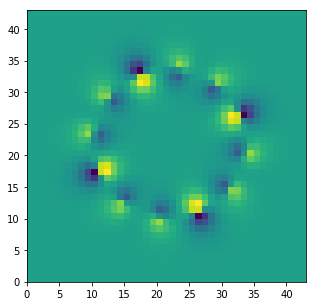

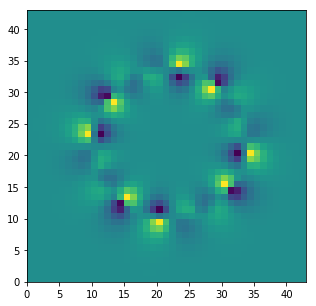

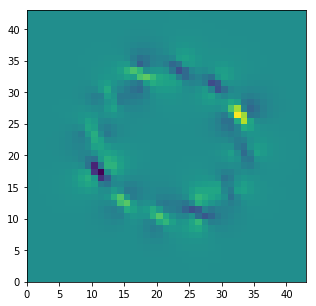

In [91]:
index = 50

plt.figure(figsize=(5, 5))
plt.pcolormesh(morb_grids[i1, index, :, :].T)
plt.show()
plt.figure(figsize=(5, 5))
plt.pcolormesh(morb_grids[i2, index, :, :].T)
plt.show()
plt.figure(figsize=(5, 5))
plt.pcolormesh(opr_morbs[i2][index, :, :].T)
plt.show()